In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns; sns.set_theme()
from sklearn import tree
import graphviz
from dtreeviz.trees import dtreeviz
import time

# Seeds Dataset

In [12]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)
df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
feature_nms = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
class_nms = ['Kama','Rosa','Canadian']

df_1 = df[df["target"]==1]
df_2 = df[df["target"]==2]
df_3 = df[df["target"]==3]
thres_dict_1 = {"perimeter":[16,13],"area":[16.8,12],"length_kernel":[6,5],"length_of_kernel_groove":[5.75,4],"asymmetry_coeff":[6,0]}
thres_dict_2 = {"length_kernel":[6.75,5.50],"length_of_kernel_groove":[7,5.5]}
thres_dict_3 = {"asymmetry_coeff":[8,2]}

for k in list(thres_dict_1.keys()):
    for i in list(df_1.index):
        if df_1.loc[i,k] > thres_dict_1[k][0] or df_1.loc[i,k] < thres_dict_1[k][1]:
            df_1.loc[i,k] = np.nan

for k in list(thres_dict_2.keys()):
    for i in list(df_2.index):
        if df_2.loc[i,k] > thres_dict_2[k][0] or df_2.loc[i,k] < thres_dict_2[k][1]:
            df_2.loc[i,k] = np.nan

for k in list(thres_dict_3.keys()):
    for i in list(df_3.index):
        if df_3.loc[i,k] > thres_dict_3[k][0] or df_3.loc[i,k] < thres_dict_3[k][1]:
            df_3.loc[i,k] = np.nan

df = pd.concat([df_1,df_2,df_3])
df = df.dropna()


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


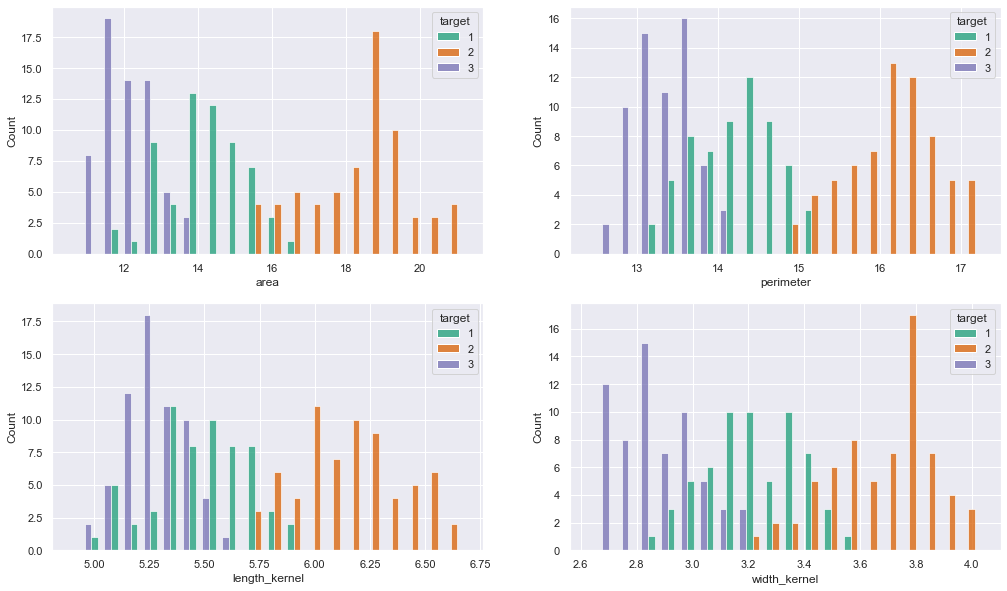

In [22]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="area",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,2)
sns.histplot(data=df,x="perimeter",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,3)
sns.histplot(data=df,x="length_kernel",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,4)
sns.histplot(data=df,x="width_kernel",hue="target",multiple="dodge", bins=20, palette='Dark2')

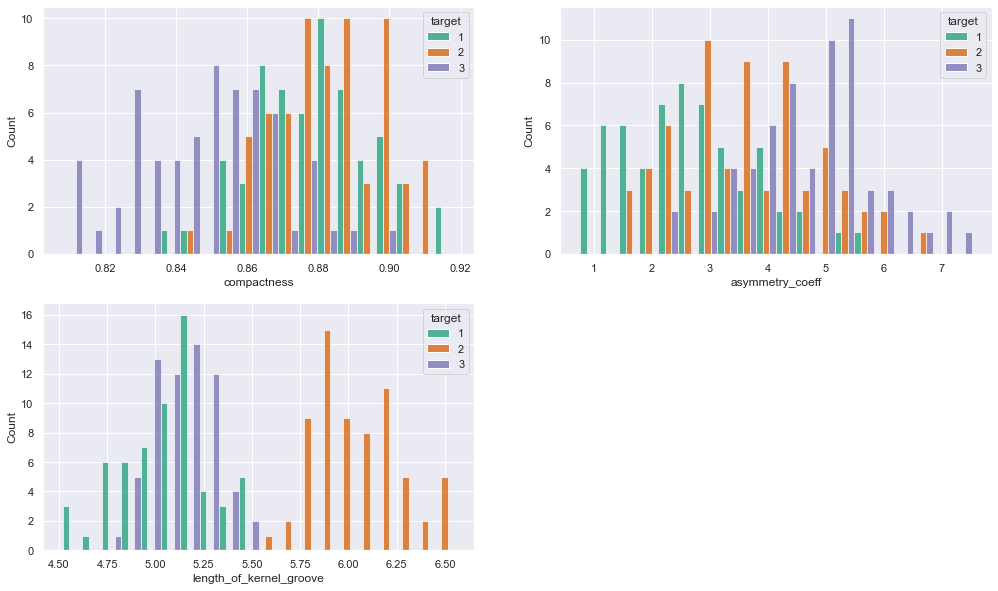

In [23]:
fig = plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x="compactness",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,2)
sns.histplot(data=df,x="asymmetry_coeff",hue="target",multiple="dodge", bins=20, palette='Dark2')
plt.subplot(2,2,3)
sns.histplot(data=df,x="length_of_kernel_groove",hue="target",multiple="dodge", bins=20, palette='Dark2')

In [13]:
feature_cols = list(df.columns)
target_col = feature_cols.pop()
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

Decision Tree Test Accuracy at depth of 10 is... 0.9743589743589743
Decision Tree Test F1-score at depth of 10 is... 0.9777530589543938
Fitting and inference takes... 0.01001429557800293


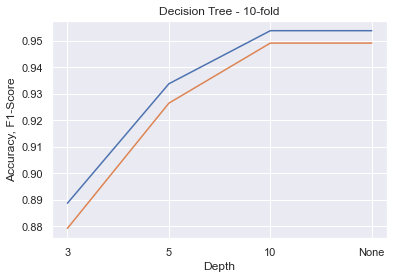

In [38]:
#Decision tree
kf = KFold(n_splits=10)
max_depth = [3,5,10,None]
performance_dict = {}
f1_dict = {}
for max_d in max_depth:
    acc = []
    f1 = []
    for train_index,val_index in kf.split(X_train):
        clf = DecisionTreeClassifier(max_depth = max_d, random_state=0, criterion='gini')
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
        f1.append(metrics.f1_score(Y_V, Y_P,average='macro'))
    performance_dict[max_d] = np.mean(acc)
    f1_dict[max_d] = np.mean(f1)
accuracies = list(performance_dict.values())
f1s = list(f1_dict.values())
plt.title("Decision Tree - 10-fold")
plt.plot([1,2,3,4], accuracies, label='Accuracy')
plt.plot([1,2,3,4], f1s, label='F1 Score')
plt.xticks([1,2,3,4],['3','5','10','None'])
plt.xlabel('Depth')
plt.ylabel('Accuracy, F1-Score')
#tree.plot_tree(clf)

t_start = time.time()
clf = DecisionTreeClassifier(max_depth = 5, random_state=0, criterion='gini')
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
t_end_DT = time.time() - t_start

DT_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
DT_Test_F1 = metrics.f1_score(Y_test, Y_P, average='macro')
print("Decision Tree Test Accuracy at depth of 10 is...", DT_Test_Acc)
print("Decision Tree Test F1-score at depth of 10 is...", DT_Test_F1)
print("Fitting and inference takes...",t_end_DT)

Random Forest Test Accuracy at depth of 5 and Max 150 no of trees is... 0.9487179487179487
Random Forest Test F1 score at depth of 5 and Max 150 no of trees is... 0.9553571428571429
Fitting and inference takes... 0.19647789001464844


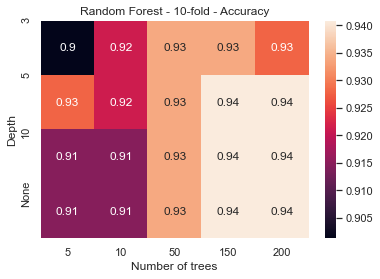

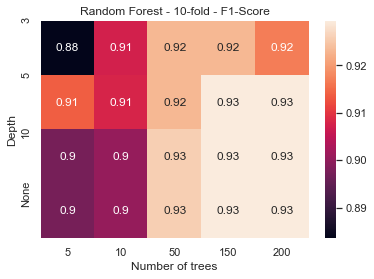

In [41]:
#Random Forest
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
max_depth = [3,5,10,None]
perf_n_tree = pd.DataFrame()
f1_n_tree = pd.DataFrame()
for n_tree in n_trees:
    perf_depth=[]
    f1_depth = []
    for max_d in max_depth:
        acc = []
        f1 = []
        for train_index,val_index in kf.split(X_train):
            clf = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
            X_Tr = X_train.iloc[train_index,:]
            Y_Tr = Y_train.iloc[train_index,:]
            X_V = X_train.iloc[val_index,:]
            Y_V = Y_train.iloc[val_index,:]
            clf = clf.fit(X_Tr, Y_Tr)
            Y_P = clf.predict(X_V)
            acc.append(metrics.accuracy_score(Y_V, Y_P))
            f1.append(metrics.f1_score(Y_V, Y_P, average='macro'))
        perf_depth.append(np.mean(acc))
        f1_depth.append(np.mean(f1))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
    perf_n_tree[str(n_tree)]=perf_depth
    f1_n_tree[str(n_tree)] = f1_depth
accuracies = list(performance_dict.values())
fig1 = plt.figure()
hm = sns.heatmap(perf_n_tree, annot=True)
plt.title("Random Forest - 10-fold - Accuracy")
plt.yticks([0,1,2,3],['3','5','10','None'])
plt.xlabel('Number of trees')
plt.ylabel('Depth')
fig2 = plt.figure()
hm2 = sns.heatmap(f1_n_tree,annot=True)
plt.title("Random Forest - 10-fold - F1-Score")
plt.yticks([0,1,2,3],['3','5','10','None'])
plt.xlabel('Number of trees')
plt.ylabel('Depth')
t_start = time.time()
clf = RandomForestClassifier(max_depth = 5, random_state=0, n_estimators=150)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
t_end_RF = time.time() - t_start
RF_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
RF_Test_F1 = metrics.f1_score(Y_test,Y_P,average='macro')
print("Random Forest Test Accuracy at depth of 5 and Max 150 no of trees is...", RF_Test_Acc)
print("Random Forest Test F1 score at depth of 5 and Max 150 no of trees is...", RF_Test_F1)
print("Fitting and inference takes...",t_end_RF)

Gradient Boosting Test Accuracy at  Max 50 no of trees is... 0.9743589743589743
Gradient Boosting Test F1-Score at  Max 50 no of trees is... 0.9777530589543938
Fitting and inference takes... 0.14262676239013672


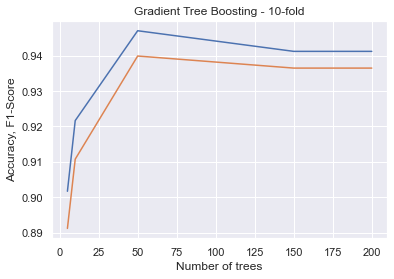

In [40]:
#Gradient Boosting Classifier
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
perf_n_tree = []
f1_n_tree = []
for n_tree in n_trees:
    acc = []
    f1 = []
    for train_index,val_index in kf.split(X_train):
        clf = GradientBoostingClassifier(n_estimators = n_tree)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
        f1.append(metrics.f1_score(Y_V, Y_P, average='macro'))
    perf_n_tree.append(np.mean(acc))
    f1_n_tree.append(np.mean(f1))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
plt.title("Gradient Tree Boosting - 10-fold")
plt.plot(n_trees, perf_n_tree, label = 'Accuracy')
plt.plot(n_trees, f1_n_tree, label = 'F1-Score')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy, F1-Score')

t_start = time.time()
clf = GradientBoostingClassifier(n_estimators=50)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
t_end_GB = time.time() - t_start

GB_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
GB_Test_F1 = metrics.f1_score(Y_test, Y_P, average='macro')
print("Gradient Boosting Test Accuracy at  Max 50 no of trees is...", GB_Test_Acc)
print("Gradient Boosting Test F1-Score at  Max 50 no of trees is...", GB_Test_F1)
print("Fitting and inference takes...",t_end_GB)

## Comparing and contrasting
### The seeds dataset is far simpler in comparison with relatively lesser number of features and samples. From the histogram plots, it is evident that it is also highly separable using the given features.

### We'll take into account four metrics for 'performance' measure comparison between the three methods:
### 1) Accuracy on data prediction
### 2) F1-Score
### 3) Fitting and inference speed (Both are considered together)(It is being considered at their best performance settings)
### 4) Interpretability

### The first and second metrics are a defacto but since these three models vary much in terms of complexity, it is only practical to take into account and compare their performance in terms of fitting and inference speed. These factors also come into consideration while deploying our model for end use.

### We can see that the mainly due to lack of class imbalance, accuracy and F1 score seem very close to each other and seem to follow the same trend for all three methods. These two metrics were chosen mainly because, accuracy, precision and recall are measures that matter most in terms of classification problems. In terms of classification performance, We can see that it is very good in all the three models. This is mainly due to the fact that the dataset is quite simple. More specifically, Decision Tree and Gradient Boosted Tree classifier performed better than Random Forest by a slight margin. Random Forest essentially builds several weak classifiers on subsets of the given data to fit the model. Since we can't interpret Random Forest unlike decision trees, we can't comment as to where that very small decrease in performance stems from, but if I were to speculate I'd say it is with the averaging among the many Decision trees it builds.

### Coming to fitting and inference speed, the simplicity of decision tree makes it the fastest among the three methods. For a dataset as simple as this, decision tree would be a great choice. Gradient Boosting Classifier has to compute an additional gradient component, so it is slower than Decision Tree. Random Forest is even slower than the other two as it has to build several trees, infer using those trees and average the result to make prediction.

### As for Interpretability, Decision Tree is the clear winner among the three models as it is very difficult to interpret the model that has been built by Random Forest and Gradient Boosting.

# Covid-19 Dataset

In [3]:
df = pd.read_csv('covid_train.csv')

df['Age_Group'] = df['Age_Group'].replace('<20',1).replace('20s',2).replace('30s',3).replace('40s',4).replace('50s',5).replace('60s',6).replace('70s',7).replace('80s',8).replace('90s',9)
df['Outcome1']=df['Outcome1'].replace('Resolved',1).replace('Fatal',-1).replace('Not Resolved',0)
df['Outbreak_Related'] = df['Outbreak_Related'].replace('Yes',1).replace(np.nan,0)
df['Client_Gender'] = df['Client_Gender'].replace('UNSPECIFIED',np.nan)
df['Case_AcquisitionInfo']=df['Case_AcquisitionInfo'].replace('TRAVEL','OTHERWISE').replace('NO KNOWN EPI LINK','OTHERWISE').replace('UNSPECIFIED EPI LINK','OTHERWISE')
df = df.dropna()

countries_chosen = ["Toronto", "Mississauga", "Newmarket", "Ottawa", "Whitby", "Windsor", "Thorold", "Hamilton", "Oakville", "Waterloo", "London", "Barrie", "Guelph", "Cornwall", "St. Thomas", "Thunder Bay", "Brockville"]
for country in list(df["Reporting_PHU_City"].unique()):
    if country not in countries_chosen:
        df['Reporting_PHU_City'] = df['Reporting_PHU_City'].replace(country,"Otherwise")

gender_dummy = pd.get_dummies(df.Client_Gender,prefix='Gender')
Case_Aq_dummy = pd.get_dummies(df.Case_AcquisitionInfo,prefix='Case_Aq')
City_dummy = pd.get_dummies(df.Reporting_PHU_City,prefix='City')
drop_clm = ['Reporting_PHU_City','Client_Gender','Case_AcquisitionInfo','Reporting_PHU_Latitude','Reporting_PHU_Longitude']
df = df.drop(columns=drop_clm)
df = pd.concat([df,City_dummy,Case_Aq_dummy],axis=1)

feature_cols = list(df.columns)
target_col = 'Outcome1'
feature_cols.remove(target_col)
df_feat = df[feature_cols]
df_target = df.drop(columns = feature_cols)
class_nms = ['Fatal','Not Resolved','Resolved']

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(df_feat,df_target, test_size = 0.2, random_state= 225)

Decision Tree Test Accuracy at depth of 10 is... 0.6595456086809088
Decision Tree Test F1-score at depth of 10 is... 0.6440847815966665
Fitting and inference takes... 0.02194070816040039


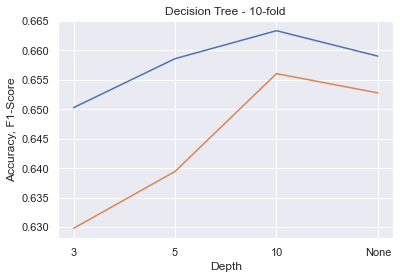

In [5]:
#Decision tree
kf = KFold(n_splits=10)
max_depth = [3,5,10,None]
performance_dict = {}
f1_dict = {}
for max_d in max_depth:
    acc = []
    f1 = []
    for train_index,val_index in kf.split(X_train):
        clf = DecisionTreeClassifier(max_depth = max_d, random_state=0, criterion='gini')
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
        f1.append(metrics.f1_score(Y_V, Y_P,average='macro'))
    performance_dict[max_d] = np.mean(acc)
    f1_dict[max_d] = np.mean(f1)
accuracies = list(performance_dict.values())
f1s = list(f1_dict.values())
plt.title("Decision Tree - 10-fold")
plt.plot([1,2,3,4], accuracies, label='Accuracy')
plt.plot([1,2,3,4], f1s, label='F1 Score')
plt.xticks([1,2,3,4],['3','5','10','None'])
plt.xlabel('Depth')
plt.ylabel('Accuracy, F1-Score')
#tree.plot_tree(clf)

t_start = time.time()
clf = DecisionTreeClassifier(max_depth = 5, random_state=0, criterion='gini')
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
t_end_DT = time.time() - t_start

DT_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
DT_Test_F1 = metrics.f1_score(Y_test, Y_P, average='macro')
print("Decision Tree Test Accuracy at depth of 10 is...", DT_Test_Acc)
print("Decision Tree Test F1-score at depth of 10 is...", DT_Test_F1)
print("Fitting and inference takes...",t_end_DT)

Random Forest Test Accuracy at depth of 10 and Max 50 no of trees is... 0.665988470668023
Random Forest Test F1 score at depth of 10 and Max 50 no of trees is... 0.6605012905671211
Fitting and inference takes... 0.40039992332458496


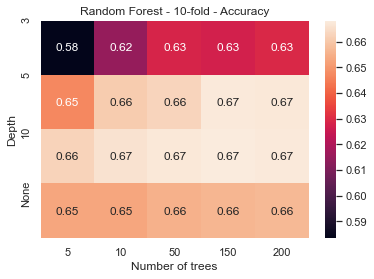

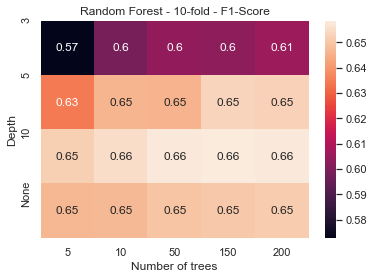

In [9]:
#Random Forest
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
max_depth = [3,5,10,None]
perf_n_tree = pd.DataFrame()
f1_n_tree = pd.DataFrame()
for n_tree in n_trees:
    perf_depth=[]
    f1_depth = []
    for max_d in max_depth:
        acc = []
        f1 = []
        for train_index,val_index in kf.split(X_train):
            clf = RandomForestClassifier(max_depth = max_d,n_estimators = n_tree, random_state=0)
            X_Tr = X_train.iloc[train_index,:]
            Y_Tr = Y_train.iloc[train_index,:]
            X_V = X_train.iloc[val_index,:]
            Y_V = Y_train.iloc[val_index,:]
            clf = clf.fit(X_Tr, Y_Tr)
            Y_P = clf.predict(X_V)
            acc.append(metrics.accuracy_score(Y_V, Y_P))
            f1.append(metrics.f1_score(Y_V, Y_P, average='macro'))
        perf_depth.append(np.mean(acc))
        f1_depth.append(np.mean(f1))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
    perf_n_tree[str(n_tree)]=perf_depth
    f1_n_tree[str(n_tree)] = f1_depth
accuracies = list(performance_dict.values())
fig1 = plt.figure()
hm = sns.heatmap(perf_n_tree, annot=True)
plt.title("Random Forest - 10-fold - Accuracy")
plt.yticks([0,1,2,3],['3','5','10','None'])
plt.xlabel('Number of trees')
plt.ylabel('Depth')
fig2 = plt.figure()
hm2 = sns.heatmap(f1_n_tree,annot=True)
plt.title("Random Forest - 10-fold - F1-Score")
plt.yticks([0,1,2,3],['3','5','10','None'])
plt.xlabel('Number of trees')
plt.ylabel('Depth')
t_start = time.time()
clf = RandomForestClassifier(max_depth = 10, random_state=0, n_estimators=50)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
t_end_RF = time.time() - t_start
RF_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
RF_Test_F1 = metrics.f1_score(Y_test,Y_P,average='macro')
print("Random Forest Test Accuracy at depth of 10 and Max 50 no of trees is...", RF_Test_Acc)
print("Random Forest Test F1 score at depth of 10 and Max 50 no of trees is...", RF_Test_F1)
print("Fitting and inference takes...",t_end_RF)

Gradient Boosting Test Accuracy at  Max 200 no of trees is... 0.6666666666666666
Gradient Boosting Test F1-Score at  Max 200 no of trees is... 0.6635678698691138
Fitting and inference takes... 8.969460010528564


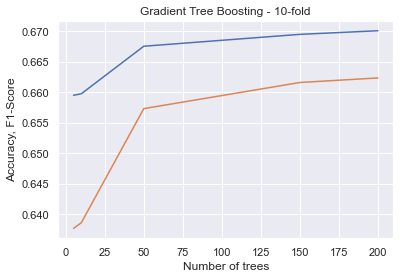

In [8]:
#Gradient Boosting Classifier
kf = KFold(n_splits=10)
n_trees = [5,10,50,150,200]
perf_n_tree = []
f1_n_tree = []
for n_tree in n_trees:
    acc = []
    f1 = []
    for train_index,val_index in kf.split(X_train):
        clf = GradientBoostingClassifier(n_estimators = n_tree)
        X_Tr = X_train.iloc[train_index,:]
        Y_Tr = Y_train.iloc[train_index,:]
        X_V = X_train.iloc[val_index,:]
        Y_V = Y_train.iloc[val_index,:]
        clf = clf.fit(X_Tr, Y_Tr)
        Y_P = clf.predict(X_V)
        acc.append(metrics.accuracy_score(Y_V, Y_P))
        f1.append(metrics.f1_score(Y_V, Y_P, average='macro'))
    perf_n_tree.append(np.mean(acc))
    f1_n_tree.append(np.mean(f1))
    #perf_n_tree[n_tree]=copy.deepcopy(perf_depth)
plt.title("Gradient Tree Boosting - 10-fold")
plt.plot(n_trees, perf_n_tree, label = 'Accuracy')
plt.plot(n_trees, f1_n_tree, label = 'F1-Score')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy, F1-Score')

t_start = time.time()
clf = GradientBoostingClassifier(n_estimators=200)
clf = clf.fit(X_train,Y_train)
Y_P = clf.predict(X_test)
t_end_GB = time.time() - t_start

GB_Test_Acc = metrics.accuracy_score(Y_test, Y_P)
GB_Test_F1 = metrics.f1_score(Y_test, Y_P, average='macro')
print("Gradient Boosting Test Accuracy at  Max 200 no of trees is...", GB_Test_Acc)
print("Gradient Boosting Test F1-Score at  Max 200 no of trees is...", GB_Test_F1)
print("Fitting and inference takes...",t_end_GB)

## Compare and contrast between methods

### Unlike seeds dataset, covid-19 dataset is relatively more complex in the sense that there are more samples and more importantly there are more features. The data does not seem easily separable, so deeper trees are bound to develop unless we do effective preprocessing.

### Same as before, we'll take into account four metrics for 'performance' measure comparison between the three methods:
### 1) Accuracy on data prediction
### 2) F1-Score
### 3) Fitting and inference speed (Both are considered together)(It is being considered at their best performance settings)
### 4) Interpretability

### Here too, Accuracy and F-1 score seem to follow the same pattern (matching highs and lows). These two metrics follow the order Gradient_Boosting > Random_Forest > Decision_Trees. Naturally, this makes sense since Gradient Boosting and Random Forest are relatively more complex and they would fit a more complex data better. However, in this case, the performance difference is only minor and isn't very stark to put one model over the other. This could be because of the nature of the data itself. Thus, in conclusion, with regards to prediction performance, all three models are comparable with only minute difference between one another.

### With regards to fitting and inference speed, Gradient_Boosting method takes much longer than the other two to give it's best performance. Perhaps the bigger size of the dataset is causing it to take longer to fit as this has a gradient calculation component as well. Decision tree, being the simplest of all, is the fastest among the three for fitting and inference. Random_Forest, even though it is slower than than Decision_Trees, it is still much faster than Gradient_Boosting. Taking into account both classification performance and speed, Decision_Trees comes out as the better among the three atleast in this setting.

### Ofcourse, when we consider Interpretability, Decision_Tree is the clear winner. However, the more complex the dataset is, the harder it might get to interpret. Preprocessing would play a vital role in improving Interpretability. 

## Performance Difference Analysis
### The performance difference in terms of speed is totally expected. Each successive model tried is more complex than the previous one. Seed data set however violates this, where Gradient_Boosting performs slightly faster than Random_Forest which might be because of us using only 50 trees for Gradient_Boosting. The speed behaviour observed in Covid-19 dataset in totally expected.
### As far as classification performance is concerned, in seed dataset, high performance of Decision_Tree, comparable to the other two complex models, is not a surprise considering the simplicity of the dataset. Random_Forest performed slightly lesser in comparison in this dataset which is slightly unexpected. We can't be sure of the reason since we can't interpret Random_Forest.
### Covid data set is more complex. All 3 models struggle to fit the given training data. This was realised in feature analysis step in CM2. More complex models perform better than simpler ones in this dataset which is as expected. But the increase in performance in complex models is quite small in the given training dataset. Normally, we'd expect a considerable increase in performance for more complex models. So this behaviour is quite unexpected. Nature of the dataset could be one reason. Another reason could be because we aren't searching the hyperparameter space more extensively. Doing so comes with a computational overhead. A more powerful machine would be required to search the hyperparameter space more extensively.